# Training Pretrained 3D UNet with Binary Focal Loss - Model 1

This notebook contains the code that I used to train a pretrained 3D U-Net model using the Binary Focal Loss function and the Adam optimizer.

## Installing and Importing Libraries

In [ ]:
!pip install segmentation_models==1.0.1 # I deleted the output of this cell since it is irrelevant.
!pip install nilearn
!pip install tensorflow-addons

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-812d801e-5e2f-0c7a-0457-4a5bd575ad68)


In [ ]:
# utils
import h5py
import os
import json
from util import load_case
from dataprocessing import get_sub_volume, standardize, CreateSubVolumes, get_config
from losses import dice_coefficient
import segmentation_models as sm
import util

# neural imaging
import nilearn as nl
import nibabel as nib
import numpy as np

# ml libs
import keras
import keras.backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from keras.callbacks import Callback, ModelCheckpoint

#Plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Pre-processing the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvf "/content/drive/MyDrive/Task01_BrainTumour.tar" -C "/content/" 

The `CreateSubVolumes()` function creates a new folder named **subvolumes** and adds subvolumes to it.

In [ ]:
jsonfile_path="/content/Task01_BrainTumour/dataset.json"
outputpath="/content/subvolumes/" 

In [ ]:
CreateSubVolumes(jsonfile_path,outputpath)

Creating the training list...


100%|██████████| 484/484 [00:00<00:00, 740891.66it/s]




Creating the sub-volumes... 


100%|██████████| 484/484 [18:23<00:00,  2.28s/it]



For 84 files, could not find a sub-volume after trying 1000 times.


In the following code, I create a config file and split the data into train and validation sets.

In [ ]:
h5_path="/content/subvolumes"
get_config(h5_path,0.20)# %20 of the data is used for validation.
with open("/content/config.json") as json_file:
    config = json.load(json_file)

In [ ]:
# Get generators for training and validation sets
train_generator = util.VolumeDataGenerator(config["train"], "/content/subvolumes/", batch_size=6, dim=(160, 160, 16), verbose=0)
valid_generator = util.VolumeDataGenerator(config["valid"], "/content/subvolumes/", batch_size=6, dim=(160, 160, 16), verbose=0)
train_generator

Let's check the shapes.

In [ ]:
data = next(iter(train_generator))
data[0].shape, data[1].shape

((6, 4, 160, 160, 16), (6, 3, 160, 160, 16))

## Training the Models


Now, I can finally start training the model. I will train three models using the `sm.losses.BinaryFocalLoss()` with 0.00001, 0.000001, and 0.0000001 learning rates.

### Model 1 : lr = 0.00001

In [ ]:
tf.keras.backend.clear_session()
binary_focal_loss = sm.losses.BinaryFocalLoss()
model_focal = util.unet_model_3d(loss_function=binary_focal_loss, initial_learning_rate=0.00001,  deconvolution=False, 
                               batch_normalization=False, metrics=['accuracy',dice_coefficient,sm.metrics.IOUScore(threshold=0.5)])

In [ ]:
model_focal.load_weights("/content/drive/MyDrive/model_pretrained.hdf5")

In [ ]:
checkpoint = ModelCheckpoint(
    'model_focal_lr000001.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'

)

history=model_focal.fit_generator(generator=train_generator,
        epochs=25,
        validation_data=valid_generator,
        callbacks=[checkpoint])

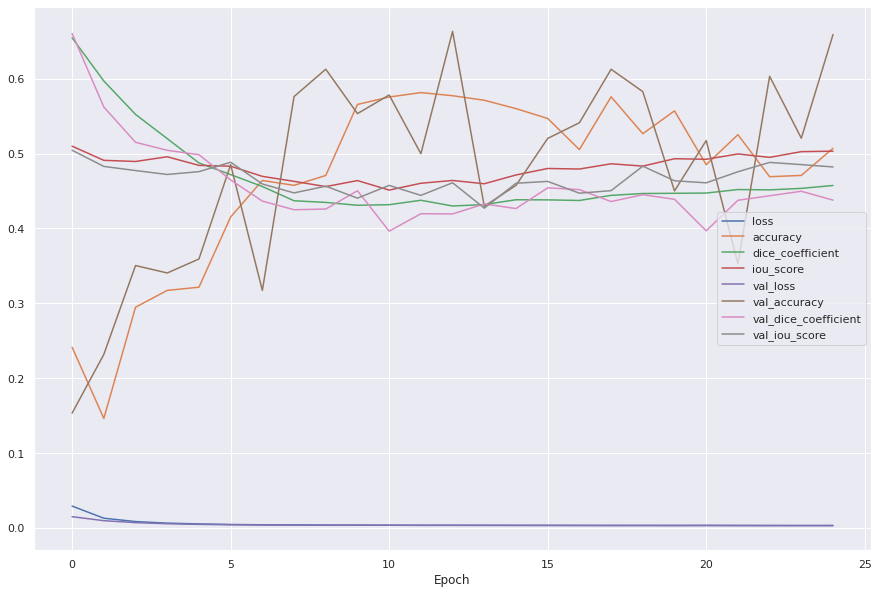

In [ ]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [ ]:
!cp -r '/content/model_focal_lr000001.h5' /content/drive/MyDrive/ # Saving the weights.

### Model 2 : lr = 0.000001

In [ ]:
tf.keras.backend.clear_session()
binary_focal_loss = sm.losses.BinaryFocalLoss()
model_focal2 = util.unet_model_3d(loss_function=binary_focal_loss, initial_learning_rate=0.000001,  deconvolution=False, 
                               batch_normalization=False, metrics=['accuracy',dice_coefficient])

In [ ]:
model_focal2.load_weights("/content/drive/MyDrive/model_pretrained.hdf5")

In [ ]:
checkpoint2 = ModelCheckpoint(
    'model_focal_lr0000001.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'

)

history2=model_focal2.fit_generator(generator=train_generator,
        epochs=25,
        validation_data=valid_generator,
        callbacks=[checkpoint2])

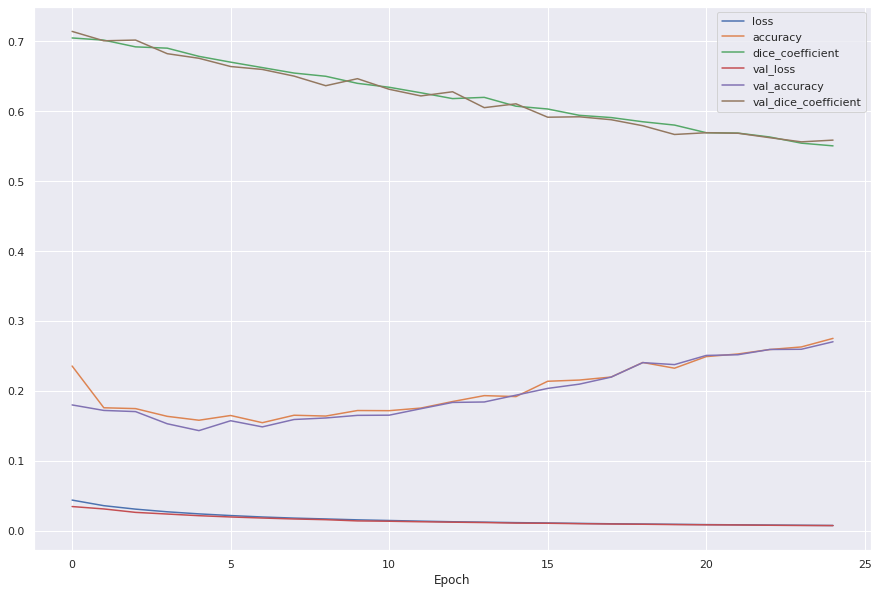

In [ ]:
sns.set_theme()
pd.DataFrame(history2.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [ ]:
!cp -r '/content/model_focal_lr0000001.h5' /content/drive/MyDrive/ # Saving the weights.

### Model 3 : lr = 0.0000001

In [ ]:
tf.keras.backend.clear_session()
binary_focal_loss = sm.losses.BinaryFocalLoss()
model_focal3 = util.unet_model_3d(loss_function=binary_focal_loss, initial_learning_rate=0.0000001,  deconvolution=False, 
                               batch_normalization=False, metrics=['accuracy',dice_coefficient])

In [ ]:
model_focal3.load_weights("/content/drive/MyDrive/model_pretrained.hdf5")

In [ ]:
from keras.callbacks import Callback, ModelCheckpoint

checkpoint3 = ModelCheckpoint(
    'model_focal_lr00000001.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'

)

history3=model_focal3.fit_generator(generator=train_generator,
        epochs=25,
        validation_data=valid_generator,
        callbacks=[checkpoint3])

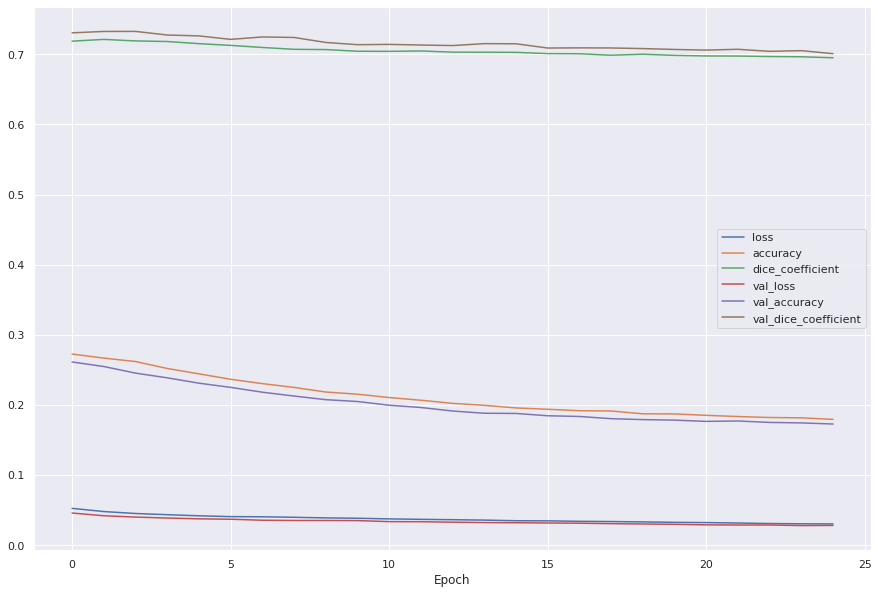

In [ ]:
sns.set_theme()
pd.DataFrame(history3.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [ ]:
!cp -r '/content/model_focal_lr00000001.h5' /content/drive/MyDrive/ # Saving the weights.